<a href="https://colab.research.google.com/github/kaziunt2022/exercise_05/blob/main/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
# Importing required libraries
import re, string, nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import gensim
from scipy.cluster import hierarchy
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [27]:
# Write your code here
text = requests.get("https://raw.githubusercontent.com/kaziunt2022/exercise_05/main/stsa-train.txt").text
data = text.split('\n')
sentiments = []
reviews = []
#sentiments= [int(review[0]) for review in data] # extract sentiments from txt file
#reviews = [review[2:] for review in data] # extract reviews from the txt file
for review in data:
  try:
    sentiments.append(int(review[0]))
    reviews.append(review[2:])
  except:pass

In [28]:
stopwords_list = stopwords.words('english') # importing stopwords
punctuations_list = string.punctuation # get punctuations
tokenizer = nltk.tokenize.TweetTokenizer() # initiliza tokenizer
lemmatizer = WordNetLemmatizer() # initialize word lemmatizer
def preprocessing(text):
    """
    This function will clean the givern text
    """
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower())
    text = text + " ".join(emoticons).replace('-', '')
    tokenize_text = [lemmatizer.lemmatize(word.lower()) for word in nltk.tokenize.word_tokenize(text) if (word not in stopwords_list) and (word not in punctuations_list) and (len(word)>=2) and (word.isalnum())]
    return " ".join(tokenize_text)
reviews = list(map(preprocessing, reviews)) # Clean all the reviews got from txt file

In [29]:
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2) # split the data as 80% train, 20% validation
c_vectorize=CountVectorizer()
X_train_reviews = c_vectorize.fit_transform(X_train) # transform the data in vector formate
X_test_reviews = c_vectorize.transform(X_test) # transform the data in vector formate


In [30]:
# Validation 
"""
Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost
"""
# make models of upper given algorithms with train data (respectively)
multinomial_model = MultinomialNB().fit(X_train_reviews, y_train)  #(1)
svm_model = LinearSVC().fit(X_train_reviews, y_train)  #(2)
knn_model = KNeighborsClassifier().fit(X_train_reviews, y_train)  #(3)
d_tree_model = DecisionTreeClassifier().fit(X_train_reviews, y_train)  #(4)
r_forest_model = RandomForestClassifier().fit(X_train_reviews, y_train)  #(5)
x_g_boost_model = GradientBoostingClassifier().fit(X_train_reviews, y_train)  #(6)
# print out score of model withrespect to validation data (respectively)
print("Score of 'MultinominalNB' for training and validationg data: ", multinomial_model.score(X_test_reviews, y_test))
print("Score of 'SVM' for training and validationg data: ", svm_model.score(X_test_reviews, y_test))
print("Score of 'KNN' for training and validationg data: ", knn_model.score(X_test_reviews, y_test))
print("Score of 'Decision tree' for training and validationg data: ", d_tree_model.score(X_test_reviews, y_test))
print("Score of 'Random Forest' for training and validationg data: ", r_forest_model.score(X_test_reviews, y_test))
print("Score of 'XGBoost' for training and validationg data: ", x_g_boost_model.score(X_test_reviews, y_test))

Score of 'MultinominalNB' for training and validationg data:  0.7774566473988439
Score of 'SVM' for training and validationg data:  0.7673410404624278
Score of 'KNN' for training and validationg data:  0.5541907514450867
Score of 'Decision tree' for training and validationg data:  0.666907514450867
Score of 'Random Forest' for training and validationg data:  0.7261560693641619
Score of 'XGBoost' for training and validationg data:  0.6524566473988439


In [31]:
scoring = ["accuracy", 'recall', 'precision', 'f1'] # parameters of evaluations
X = c_vectorize.fit_transform(reviews) # get vectorized form of reviews
y = sentiments 
# Apply cross validationn to each above mentioed algorithms with k-fold=10
mulit_nomial_scores = cross_validate(MultinomialNB(), X, y, scoring=scoring, cv=10)
svm_score = cross_validate(LinearSVC(), X, y, scoring=scoring, cv=10)
knn_score = cross_validate(KNeighborsClassifier(), X, y, scoring=scoring, cv=10)
d_tree_score = cross_validate(DecisionTreeClassifier(), X, y, scoring=scoring, cv=10)
r_forest_score = cross_validate(RandomForestClassifier(), X, y, scoring=scoring, cv=10)
xg_boost_score = cross_validate(GradientBoostingClassifier(), X, y, scoring=scoring, cv=10)

In [32]:
# Print out the eveluations
print("-------- MultinominalNB Cross Validation to Validations Set --------")
print("Accuracy:\t", mulit_nomial_scores["test_accuracy"].mean())
print("Recall:\t", mulit_nomial_scores["test_recall"].mean())
print("Precesion:\t", mulit_nomial_scores["test_precision"].mean())
print('F-1:\t', mulit_nomial_scores["test_f1"].mean())
print()
print("-------- SVM Cross Validation to Validations Set --------")
print("Accuracy:\t", svm_score["test_accuracy"].mean())
print("Recall:\t", svm_score["test_recall"].mean())
print("Precesion:\t", svm_score["test_precision"].mean())
print('F-1:\t', svm_score["test_f1"].mean())
print()
print("-------- KNN Cross Validation to Validations Set --------")
print("Accuracy:\t", knn_score["test_accuracy"].mean())
print("Recall:\t", knn_score["test_recall"].mean())
print("Precesion:\t", knn_score["test_precision"].mean())
print('F-1:\t', knn_score["test_f1"].mean())
print()
print("-------- Decision tree Cross Validation to Validations Set --------")
print("Accuracy:\t", d_tree_score["test_accuracy"].mean())
print("Recall:\t", d_tree_score["test_recall"].mean())
print("Precesion:\t", d_tree_score["test_precision"].mean())
print('F-1:\t', d_tree_score["test_f1"].mean())
print()
print("-------- Random Forest Cross Validation to Validations Set --------")
print("Accuracy:\t", r_forest_score["test_accuracy"].mean())
print("Recall:\t", r_forest_score["test_recall"].mean())
print("Precesion:\t", r_forest_score["test_precision"].mean())
print('F-1:\t', r_forest_score["test_f1"].mean())
print()
print("-------- XGBoost Cross Validation to Validations Set --------")
print("Accuracy:\t", xg_boost_score["test_accuracy"].mean())
print("Recall:\t", xg_boost_score["test_recall"].mean())
print("Precesion:\t", xg_boost_score["test_precision"].mean())
print('F-1:\t', xg_boost_score["test_f1"].mean())


-------- MultinominalNB Cross Validation to Validations Set --------
Accuracy:	 0.7823699421965318
Recall:	 0.8083102493074792
Precesion:	 0.7822365794249799
F-1:	 0.7949480085571904

-------- SVM Cross Validation to Validations Set --------
Accuracy:	 0.7592485549132948
Recall:	 0.7695290858725762
Precesion:	 0.7692580430593169
F-1:	 0.7692587818965718

-------- KNN Cross Validation to Validations Set --------
Accuracy:	 0.5552023121387284
Recall:	 0.39833795013850415
Precesion:	 0.6138959076697322
F-1:	 0.4781152020676602

-------- Decision tree Cross Validation to Validations Set --------
Accuracy:	 0.6777456647398844
Recall:	 0.6673130193905816
Precesion:	 0.7004999240378729
F-1:	 0.6833464150550376

-------- Random Forest Cross Validation to Validations Set --------
Accuracy:	 0.7335260115606937
Recall:	 0.7329639889196675
Precesion:	 0.7508292223237328
F-1:	 0.7414473499953559

-------- XGBoost Cross Validation to Validations Set --------
Accuracy:	 0.6557803468208092
Recall:	 0.

In [33]:
# Write your code here
text = requests.get("https://raw.githubusercontent.com/kaziunt2022/exercise_05/main/stsa-test.txt").text
data = text.split('\n')
test_sentiments = []
test_reviews = []
#sentiments= [int(review[0]) for review in data] # extract sentiments from txt file
#reviews = [review[2:] for review in data] # extract reviews from the txt file
for review in data:
  try:
    test_sentiments.append(int(review[0]))
    test_reviews.append(review[2:])
  except:pass

In [34]:
test_reviews = list(map(preprocessing, test_reviews)) # clean the reviews

In [35]:
X = c_vectorize.fit_transform(reviews) # make vector of reviews
y = sentiments
X_test_d = c_vectorize.transform(test_reviews) # make vector of test reviews
y_test_d = test_sentiments

In [36]:
# make models of given algortihms respectively,  with training reviews and sentiments
multinomial_model = MultinomialNB().fit(X, y)
svm_model = LinearSVC().fit(X, y)
knn_model = KNeighborsClassifier().fit(X, y)
d_tree_model = DecisionTreeClassifier().fit(X, y)
r_forest_model = RandomForestClassifier().fit(X, y)
x_g_boost_model = GradientBoostingClassifier().fit(X, y)
# print out the score of models with respect to test reviews and sentiments
print("Score of 'MultinominalNB' for training and test data: ", multinomial_model.score(X_test_d, y_test_d))
print("Score of 'SVM' for training and test data: ", svm_model.score(X_test_d, y_test_d))
print("Score of 'KNN' for training and test data: ", knn_model.score(X_test_d, y_test_d))
print("Score of 'Decision tree' for training and test data: ", d_tree_model.score(X_test_d, y_test_d))
print("Score of 'Random Forest' for training and test data: ", r_forest_model.score(X_test_d, y_test_d))
print("Score of 'XGBoost' for training and test data: ", x_g_boost_model.score(X_test_d, y_test_d))

Score of 'MultinominalNB' for training and test data:  0.8116419549697969
Score of 'SVM' for training and test data:  0.7732015376166941
Score of 'KNN' for training and test data:  0.5656232839099395
Score of 'Decision tree' for training and test data:  0.6798462383305875
Score of 'Random Forest' for training and test data:  0.742998352553542
Score of 'XGBoost' for training and test data:  0.6523887973640856


In [37]:
scoring = ["accuracy", 'recall', 'precision', 'f1'] # evaluating criteria
# Apply cross validationn to each above mentioed algorithms with k-fold=10
mulit_nomial_scores = cross_validate(multinomial_model, X_test_d, y_test_d, scoring=scoring, cv=10)
svm_score = cross_validate(svm_model, X_test_d, y_test_d, scoring=scoring, cv=10)
knn_score = cross_validate(knn_model, X_test_d, y_test_d, scoring=scoring, cv=10)
d_tree_score = cross_validate(d_tree_model, X_test_d, y_test_d, scoring=scoring, cv=10)
r_forest_score = cross_validate(r_forest_model, X_test_d, y_test_d, scoring=scoring, cv=10)
X_test_dg_boost_score = cross_validate(x_g_boost_model, X_test_d, y_test_d, scoring=scoring, cv=10)

In [38]:
# print out cross validation scores
print("-------- MultinominalNB Cross Validation to test data --------")
print("Accuracy:\t", mulit_nomial_scores["test_accuracy"].mean())
print("Recall:\t", mulit_nomial_scores["test_recall"].mean())
print("Precesion:\t", mulit_nomial_scores["test_precision"].mean())
print('F-1:\t', mulit_nomial_scores["test_f1"].mean())
print()
print("-------- SVM Cross Validation to test data --------")
print("Accuracy:\t", svm_score["test_accuracy"].mean())
print("Recall:\t", svm_score["test_recall"].mean())
print("Precesion:\t", svm_score["test_precision"].mean())
print('F-1:\t', svm_score["test_f1"].mean())
print()
print("-------- KNN Cross Validation to test data --------")
print("Accuracy:\t", knn_score["test_accuracy"].mean())
print("Recall:\t", knn_score["test_recall"].mean())
print("Precesion:\t", knn_score["test_precision"].mean())
print('F-1:\t', knn_score["test_f1"].mean())
print()
print("-------- Decision tree Cross Validation to test data --------")
print("Accuracy:\t", d_tree_score["test_accuracy"].mean())
print("Recall:\t", d_tree_score["test_recall"].mean())
print("Precesion:\t", d_tree_score["test_precision"].mean())
print('F-1:\t', d_tree_score["test_f1"].mean())
print()
print("-------- Random Forest Cross Validation to test data --------")
print("Accuracy:\t", r_forest_score["test_accuracy"].mean())
print("Recall:\t", r_forest_score["test_recall"].mean())
print("Precesion:\t", r_forest_score["test_precision"].mean())
print('F-1:\t', r_forest_score["test_f1"].mean())
print()
print("-------- XGBoost Cross Validation to test data --------")
print("Accuracy:\t", xg_boost_score["test_accuracy"].mean())
print("Recall:\t", xg_boost_score["test_recall"].mean())
print("Precesion:\t", xg_boost_score["test_precision"].mean())
print('F-1:\t', xg_boost_score["test_f1"].mean())


-------- MultinominalNB Cross Validation to test data --------
Accuracy:	 0.718278988770792
Recall:	 0.734957264957265
Precesion:	 0.7122616814538411
F-1:	 0.7222593953217628

-------- SVM Cross Validation to test data --------
Accuracy:	 0.6858974358974359
Recall:	 0.6732234432234433
Precesion:	 0.6915951561452067
F-1:	 0.6810020678774171

-------- KNN Cross Validation to test data --------
Accuracy:	 0.5041313877379452
Recall:	 0.02748473748473749
Precesion:	 0.5708333333333333
F-1:	 0.05195067693517839

-------- Decision tree Cross Validation to test data --------
Accuracy:	 0.6403080526031346
Recall:	 0.593980463980464
Precesion:	 0.6533647556196273
F-1:	 0.621796934564922

-------- Random Forest Cross Validation to test data --------
Accuracy:	 0.6721551672371345
Recall:	 0.5488644688644689
Precesion:	 0.7253836263269697
F-1:	 0.6224970954308027

-------- XGBoost Cross Validation to test data --------
Accuracy:	 0.6557803468208092
Recall:	 0.8371191135734073
Precesion:	 0.62786809

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [39]:
#Write your code here.
df = pd.read_csv("https://raw.githubusercontent.com/kaziunt2022/exercise_05/main/Amazon%20Reviews.CSV", usecols=["Reviews"]) # import the data as pandas dataframe
df['Reviews'].replace('', np.nan, inplace=True) # replace empty rows with NAN
df.dropna(subset=['Reviews'], inplace=True) # remove rows having NAN
amazon_reviews = list(df['Reviews'])  # get reviews in list formate

In [40]:
amazon_reviews = list(map(preprocessing, amazon_reviews)) # clean the reviews

In [41]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(amazon_reviews) # convert reviews in vector formate

In [42]:
model = KMeans(n_clusters = 10,init='k-means++',random_state=99) # Inititate k-means model 
model.fit(bow) # apply k0means model to reviews
cluster_labels = model.labels_ # get cluster labels
df['K-mean Clusters'] = cluster_labels # save cluster labels in dataframe
cluster_center=model.cluster_centers_ # get cluster center

s_score = silhouette_score(bow, cluster_labels) # get silhouette score
print("Silhouette_score of K-means clustering: ", s_score)

Silhouette_score of K-means clustering:  0.04616664949602914


In [44]:
# print out top 10 clusters with their top 10 keywords 
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10): print("Cluster -->" , i+1, '-->', [terms[ind] for ind in order_centroids[i, :10]])

Cluster --> 1 --> ['phone', 'one', 'work', 'screen', 'great', 'good', 'new', 'would', 'get', 'iphone']
Cluster --> 2 --> ['good', 'work', 'great', 'iphone', 'product', 'new', 'like', 'love', 'condition', 'one']
Cluster --> 3 --> ['phone', 'screen', 'camera', 'like', 'one', 'get', 'good', 'would', 'battery', 'use']
Cluster --> 4 --> ['phone', 'screen', 'good', 'one', 'great', 'time', 'get', 'like', 'use', 'would']
Cluster --> 5 --> ['phone', 'tracfone', 'data', 'time', 'call', 'work', 'use', 'android', 'wifi', 'picture']
Cluster --> 6 --> ['phone', 'idol', 'camera', 'like', 'one', 'sound', 'feature', 'think', 'screen', 'quality']
Cluster --> 7 --> ['phone', 'good', 'screen', 'use', 'like', 'card', 'battery', 'sim', 'one', 'great']
Cluster --> 8 --> ['phone', 'like', 'really', 'problem', 'go', 'screen', 'work', 'one', 'make', 'get']
Cluster --> 9 --> ['phone', 'quality', 'good', 'camera', 'one', 'like', 'moto', 'light', 'display', 'people']
Cluster --> 10 --> ['phone', 'great', 'work', '

In [45]:
# Print out one review for each cluster
for i in range(10):
    print("*"*70, "\n","Cluster: ", i+1)
    print(df.iloc[df.groupby(['K-mean Clusters']).groups[i][0]]["Reviews"])

********************************************************************** 
 Cluster:  1
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
********************************************************************** 
 Cluster:  2
Very pleased
********************************************************************** 
 Cluster:  3
Keeping in mind that this is a sub $100 phone that has generally been advertised as the "cheapest quad-core phone," the Landvo L800 has turned out to be a good phone that has exceeded my expectations. From all my research, Landvo seems to be a new company and the L800 was their first model which they released in March of 2014. I took a risk (although less

In [46]:
model = DBSCAN(min_samples=10) # initiate DBSCAN model
model.fit(bow) # fit thhe model on vector form of reviews
cluster_labels = model.labels_ # get the cluster labels
df['DBSCAN Clusters'] = cluster_labels
s_score = silhouette_score(bow, cluster_labels) # get and print silhouette score
print("Silhouette_score of K-means clustering: ", s_score)

Silhouette_score of K-means clustering:  -0.2908932297517206


In [47]:
for i in range(len(set(cluster_labels))-1): # print clusters with keywords
    print("*"*70, "\n", "Cluster: ", i+1)
    print(df.iloc[df.groupby(['DBSCAN Clusters']).groups[i][0]]["Reviews"])

********************************************************************** 
 Cluster:  1
excellent
********************************************************************** 
 Cluster:  2
excelente
********************************************************************** 
 Cluster:  3
I love it!
********************************************************************** 
 Cluster:  4
very good
********************************************************************** 
 Cluster:  5
BAD
********************************************************************** 
 Cluster:  6
Excellent Product.
********************************************************************** 
 Cluster:  7
Perfect
********************************************************************** 
 Cluster:  8
Great phone.
********************************************************************** 
 Cluster:  9
Thank you
********************************************************************** 
 Cluster:  10
Good phone
*******************************************

In [48]:
w2v_model=gensim.models.Word2Vec(amazon_reviews) # inititate model to convert words into vectors

In [49]:
import numpy as np
sent_vectors = []
for sent in amazon_reviews:
    """
    This fucntion will convert each word of revews to a vector form
    """
    sent_vec = np.zeros(100)
    cnt_words =0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except: pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors) # each word of a sentence as a vestor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


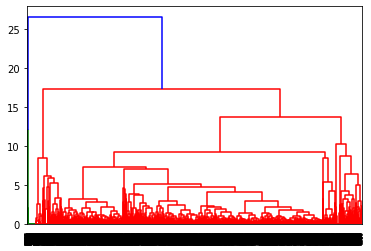

In [50]:
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward')) # show hierarchy

In [58]:
# as noted above their are total 4 main clusters 
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  #took n=4 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [59]:

df['Hierarchical Clusters'] = cluster.labels_ # store cluster labels
s_score = silhouette_score(bow, cluster.labels_)
print("Silhouette_score of K-means clustering: ", s_score) # print silhuete score

Silhouette_score of K-means clustering:  -0.3015293799255219


In [60]:
for i in range(len(set(cluster.labels_))): # print clusters with reviews
    print("*"*70, "\n", "Cluster: ", i+1)
    print(df.iloc[df.groupby(['Hierarchical Clusters']).groups[i][0]]["Reviews"])

********************************************************************** 
 Cluster:  1
very good
********************************************************************** 
 Cluster:  2
was not in good condition but does work good
********************************************************************** 
 Cluster:  3
Very pleased
********************************************************************** 
 Cluster:  4
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [61]:
#You can write you answer here. (No code needed)
"""
clustering method in which we make cluster s of data test(in our case the data set was text). 
K-means is most simple method provide n-number of clusters which can be small or large dependes in value of n. Although it is
most simple and fast method but by changing number of clusters the clusters can overlap each other. but this is not in case of others
DBSCAN is an advance method and as we saw it provide limited number of clusters, and they are not overlapping each other. but it provide more simple clusters. and they are not so unique!
Hierarchical clustering is most advance and useful method. it has limited number of totaly independent and unique clusters with unique data sets
"""


'\nclustering method in which we make cluster s of data test(in our case the data set was text). \nK-means is most simple method provide n-number of clusters which can be small or large dependes in value of n. Although it is\nmost simple and fast method but by changing number of clusters the clusters can overlap each other. but this is not in case of others\nDBSCAN is an advance method and as we saw it provide limited number of clusters, and they are not overlapping each other. but it provide more simple clusters. and they are not so unique!\nHierarchical clustering is most advance and useful method. it has limited number of totaly independent and unique clusters with unique data sets\n'